In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from collections import defaultdict

In [2]:
help(pd.DataFrame.iloc)

Help on property:

    Purely integer-location based indexing for selection by position.
    
    ``.iloc[]`` is primarily integer position based (from ``0`` to
    ``length-1`` of the axis), but may also be used with a boolean
    array.
    
    Allowed inputs are:
    
    - An integer, e.g. ``5``.
    - A list or array of integers, e.g. ``[4, 3, 0]``.
    - A slice object with ints, e.g. ``1:7``.
    - A boolean array.
    - A ``callable`` function with one argument (the calling Series, DataFrame
      or Panel) and that returns valid output for indexing (one of the above)
    
    ``.iloc`` will raise ``IndexError`` if a requested indexer is
    out-of-bounds, except *slice* indexers which allow out-of-bounds
    indexing (this conforms with python/numpy *slice* semantics).
    
    See more at :ref:`Selection by Position <indexing.integer>`



In [15]:
url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
data = pd.read_html(url)


In [16]:
# duplicate = data
data = duplicate

In [17]:
data

[      0                                 1        2        3      4        5   \
 0     Nº  Country (or dependent territory)     1950     1955      %     1960   
 1      1                       Afghanistan     8151     8892   1.76     9830   
 2      2                           Albania     1228     1393   2.56     1624   
 3      3                           Algeria     8893     9842   2.05    10910   
 4      4                    American Samoa       20       20   0.72       21   
 5      5                           Andorra        7        7   0.04        9   
 6      6                            Angola     4118     4424   1.44     4798   
 7      7                          Anguilla        6        6   0.80        6   
 8      8               Antigua and Barbuda       46       52   2.19       55   
 9      9                         Argentina    17151    18928   1.99    20617   
 10    10                           Armenia     1356     1566   2.92     1869   
 11    11                   

In [18]:
data = data[0:3]
for i in range(len(data)):
    data[i].columns = data[i].iloc[0]
    data[i] = data[i].iloc[1:-1]
data[0].head()

,Nº,Country (or dependent territory),1950,1955,%,1960,%,1965,%,1970,%,1975,%,1980,%
1,1,Afghanistan,8151,8892,1.76,9830,2.03,10998,2.27,12431,2.48,14133,2.60,15045,1.26
2,2,Albania,1228,1393,2.56,1624,3.12,1884,3.02,2157,2.74,2402,2.17,2672,2.16
3,3,Algeria,8893,9842,2.05,10910,2.08,11964,1.86,13932,3.09,16141,2.99,18807,3.10
4,4,American Samoa,20,20,0.72,21,0.20,25,4.23,28,2.08,30,1.68,33,1.81
5,5,Andorra,7,7,0.04,9,6.28,14,10.17,20,7.49,27,6.32,34,4.81


In [19]:
for i in range(len(data)):
    data[i]=data[i].drop('%',1)
    print(data[i].tail())


0     Nº Country (or dependent territory)  1950  1955  1960  1965  1970  1975  \
223  223                Wallis and Futuna     7     8     8     9     9     9   
224  224                   Western Sahara    10    16    28    50    90    73   
225  225                            Yemen  4778  5266  5872  6511  7099  7935   
226  226                           Zambia  2554  2870  3255  3695  4241  4849   
227  227                         Zimbabwe  2854  3410  4011  4686  5515  6342   

0    1980  
223    11  
224   125  
225  9133  
226  5541  
227  7170  
0     Nº Country (or dependent territory)   1985   1990   1995   2000   2005  \
223  223                Wallis and Futuna     14     14     15     15     16   
224  224                   Western Sahara    180    218    264    337    416   
225  225                            Yemen  10540  12417  14832  17236  20003   
226  226                           Zambia   6536   7604   8691   9984  11373   
227  227                         Zimbabwe

In [30]:
data[1]= data[1].iloc[:,1:]
data[0]= data[0].iloc[:,1:]
data[2]= data[2].iloc[:,1:]

In [31]:
data[1].tail()

,Country (or dependent territory),1985,1990,1995,2000,2005,2010,2015
223,Wallis and Futuna,14,14,15,15,16,16,16
224,Western Sahara,180,218,264,337,416,492,571
225,Yemen,10540,12417,14832,17236,20003,23210,26738
226,Zambia,6536,7604,8691,9984,11373,13042,15067
227,Zimbabwe,8561,10157,11160,11821,11640,11652,14230


In [32]:
data[2]

,Country (or dependent territory),2020,2025,2030,2035,2040,2045,2050
1,Afghanistan,36644,41118,45665,50195,54717,59256,63796
2,Albania,3075,3105,3103,3063,2994,2913,2825
3,Algeria,42973,45842,48149,50118,52030,53894,55445
4,American Samoa,54,54,53,52,51,50,50
5,Andorra,86,86,85,83,82,79,75
6,Angola,22485,25674,29155,32910,36948,41280,45889
7,Anguilla,19,20,22,23,25,26,27
8,Antigua and Barbuda,99,104,110,114,118,121,123
9,Argentina,45379,47165,48796,50273,51574,52663,53512
10,Armenia,3022,2962,2884,2796,2699,2590,2469


In [35]:
x = pd.merge(left=data[0],right=data[1])
x = pd.merge(left=x,right= data[2])
countries = np.array(x['Country (or dependent territory)'])
x = x.drop(['Country (or dependent territory)'],1)
x = x.set_index(countries)
x.head()
x.tail()


,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
Wallis and Futuna,7,8,8,9,9,9,11,14,14,15,...,16,16,16,16,17,17,17,16,16,16
Western Sahara,10,16,28,50,90,73,125,180,218,264,...,416,492,571,653,736,822,909,998,1086,1174
Yemen,4778,5266,5872,6511,7099,7935,9133,10540,12417,14832,...,20003,23210,26738,29885,32823,35660,38437,41142,43710,46081
Zambia,2554,2870,3255,3695,4241,4849,5541,6536,7604,8691,...,11373,13042,15067,17427,20105,23137,26546,30339,34497,38993
Zimbabwe,2854,3410,4011,4686,5515,6342,7170,8561,10157,11160,...,11640,11652,14230,15832,17371,18820,20282,21840,23492,25199


In [36]:
x.iloc[:2,:2]

,1950,1955
Afghanistan,8151,8892
Albania,1228,1393


In [37]:
x[1955]

Afghanistan                       8892
Albania                           1393
Algeria                           9842
American Samoa                      20
Andorra                              7
Angola                            4424
Anguilla                             6
Antigua and Barbuda                 52
Argentina                        18928
Armenia                           1566
Aruba                               54
Australia                         9278
Austria                           6947
Azerbaijan                        3314
Bahamas                             88
Bahrain                            131
Bangladesh                       49589
Barbados                           228
Belarus                           7781
Belgium                           8869
Belize                              77
Benin                             1847
Bermuda                             42
Bhutan                             187
Bolivia                           3075
Bosnia and Herzegovina   

In [38]:
x[1950].max()

562580

In [39]:
x.axes

[Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
        'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
        ...
        'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
        'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
       dtype='object', length=227),
 Index([1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
        2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050],
       dtype='object', name=0)]

In [40]:
row = x.ix[0]

In [41]:
row.name

'Afghanistan'

In [42]:
row.index

Index([1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050],
      dtype='object', name=0)

In [43]:
x.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=227)

In [44]:
x.loc['Austria']

0
1950    6936
1955    6947
1960    7048
1965    7271
1970    7468
1975    7579
1980    7550
1985    7560
1990    7723
1995    8048
2000    8114
2005    8315
2010    8448
2015    8666
2020    8860
2025    8988
2030    9075
2035    9121
2040    9136
2045    9129
2050    9108
Name: Austria, dtype: int64

/Users/anshu/anaconda/envs/3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/anshu/anaconda/envs/3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


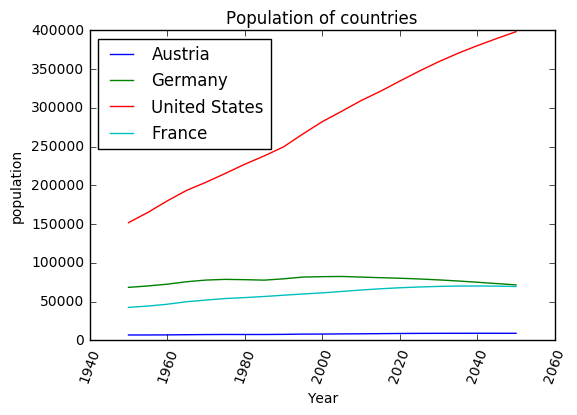

In [45]:
plotCountries = ['Austria', 'Germany', 'United States', 'France']
for country in plotCountries:
    plt.plot(x.columns,x.loc[country],label=country)
    
plt.xticks(rotation = 70)
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('population')
plt.title("Population of countries")

In [46]:
def plot_populous(x,year):
    y = x.sort_values(by = year,ascending=False)
#     print(y.head())
#     plt.plot(x.columns,y.iloc[0,:])
    for i in range(5):
        plt.plot(y.columns,y.iloc[i,:],'-')
    plt.xticks(rotation=70)
    plt.legend(loc='best')
    plt.xlabel("Year")
    plt.ylabel("# people (million)")
   

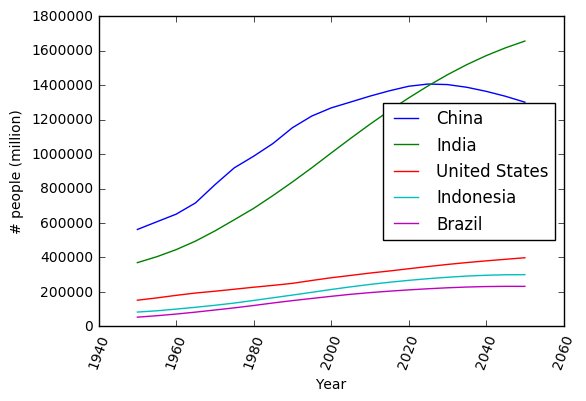

In [47]:
plot_populous(x,2010)


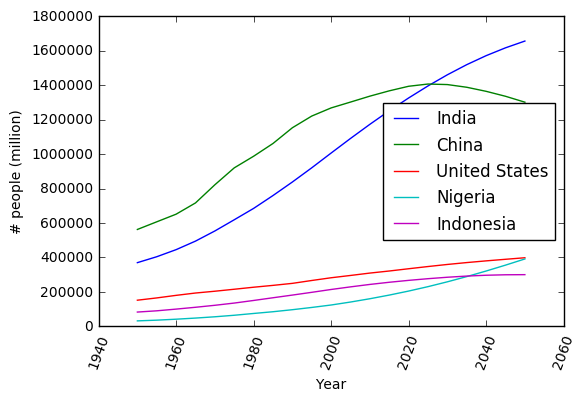

In [48]:
plot_populous(x,2050)



In [49]:
def edits1(word):
   splits     = [(word[:i], word[i:]) for i in range(len(word) + 1)]
   deletes    = [a + b[1:] for a, b in splits if b]
   transposes = [a + b[1] + b[0] + b[2:] for a, b in splits if len(b)>1]
   replaces   = [a + c + b[1:] for a, b in splits for c in alphabet if b]
   inserts    = [a + c + b     for a, b in splits for c in alphabet]
   return set(deletes + transposes + replaces + inserts)

In [50]:
edits1('ala')

NameError: name 'alphabet' is not defined